In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display

import feature_extraction as fe



In [16]:
# DISPLAY WAVEPLOT
def display_waveplot(file_name, output_file_name, sr):
    samples, sr = librosa.load(file_name)
    plt.figure(figsize=(8, 4))
    librosa.display.waveplot(samples, sr=sr)
    plt.title(file_name + ' ' + output_file_name)
    plt.savefig(output_file_name)
    return samples

In [18]:
OLD_SAMPLING_RATE = 44100
HUMAIN_VOICE_SAMPLING_RATE = 8000
sampling_rate = HUMAIN_VOICE_SAMPLING_RATE

female_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_02/03-01-01-01-01-01-02.wav'
female_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_02/03-01-05-02-01-01-02.wav'

male_neutral_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-01-01-01-01-01.wav'
male_angry_strong_file = 'data/RAVDESS/Audio_Speech_Actors_01-24/Actor_01/03-01-05-02-01-01-01.wav'

female_neutral_image = 'images/female_neutral.jpeg'
female_angry_strong_image = 'images/female_angry_strong.jpeg'

male_neutral_image = 'images/male_neutral.jpeg'
male_angry_strong_image = 'images/male_angry_strong.jpeg'

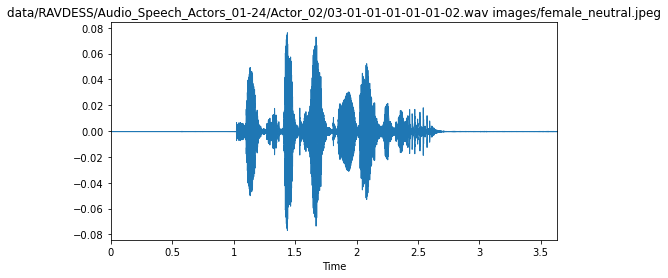

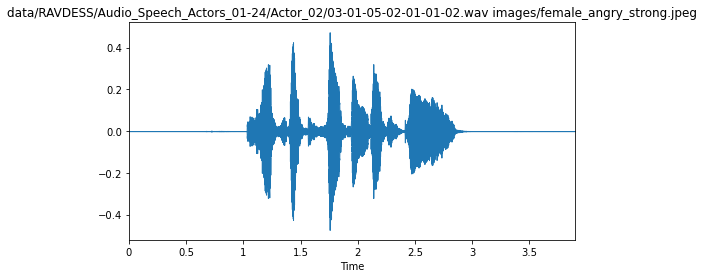

In [19]:
samples_female_neutral = display_waveplot(female_neutral_file, female_neutral_image, sampling_rate)
samples_female_angry_strong = display_waveplot(female_angry_strong_file, female_angry_strong_image, sampling_rate)

In [20]:
def display_spectrogram(samples, filename):
    ft = np.abs(librosa.stft(samples))
    plt.plot(ft);
    plt.title('Spectrum ' + filename);
    plt.xlabel('Frequency Bin');
    plt.ylabel('Amplitude');
    plt.savefig(filename + '_fq_t.jpeg')
    plt.show()

 #   plt.figure(figsize=(40, 20))

    librosa.display.specshow(ft, sr=sampling_rate, x_axis='time', y_axis='linear');
    plt.title('Spectrum ' + filename);

    plt.colorbar()
    plt.savefig(filename+ '_spectrogram.jpeg')
    plt.show()

    librosa.display.specshow(librosa.amplitude_to_db(ft, ref=np.max), y_axis='log', x_axis='time')
    plt.title(filename + ' Power Spectrogram')
    plt.colorbar(format="%+2.0f dB")
    plt.savefig(filename+ '_power_spectrogram.jpeg')
    plt.show()



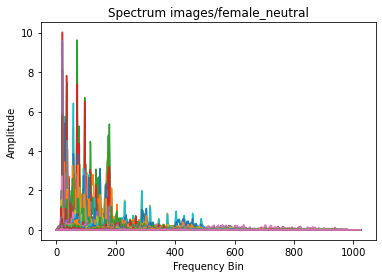

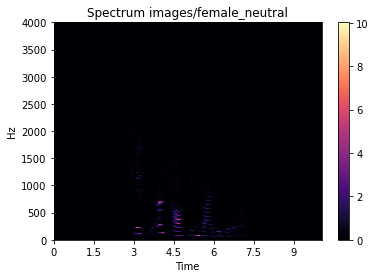

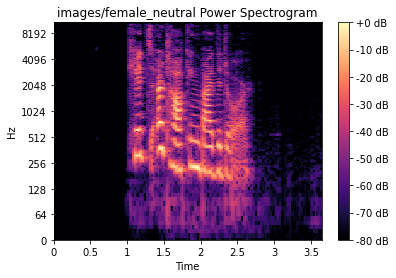

In [22]:
 display_spectrogram(samples_female_neutral, 'images/female_neutral')

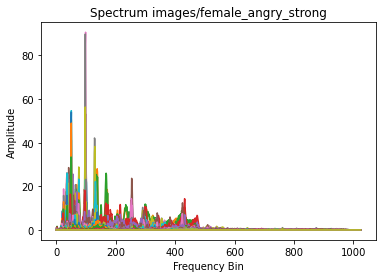

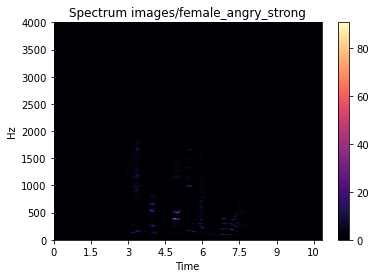

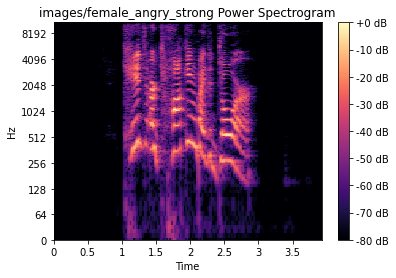

In [23]:
display_spectrogram(samples_female_angry_strong, 'images/female_angry_strong')

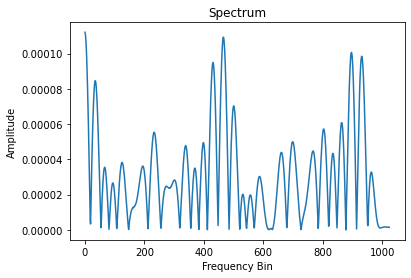

In [12]:
n_fft = 2048
ft = np.abs(librosa.stft(samples_female_neutral[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

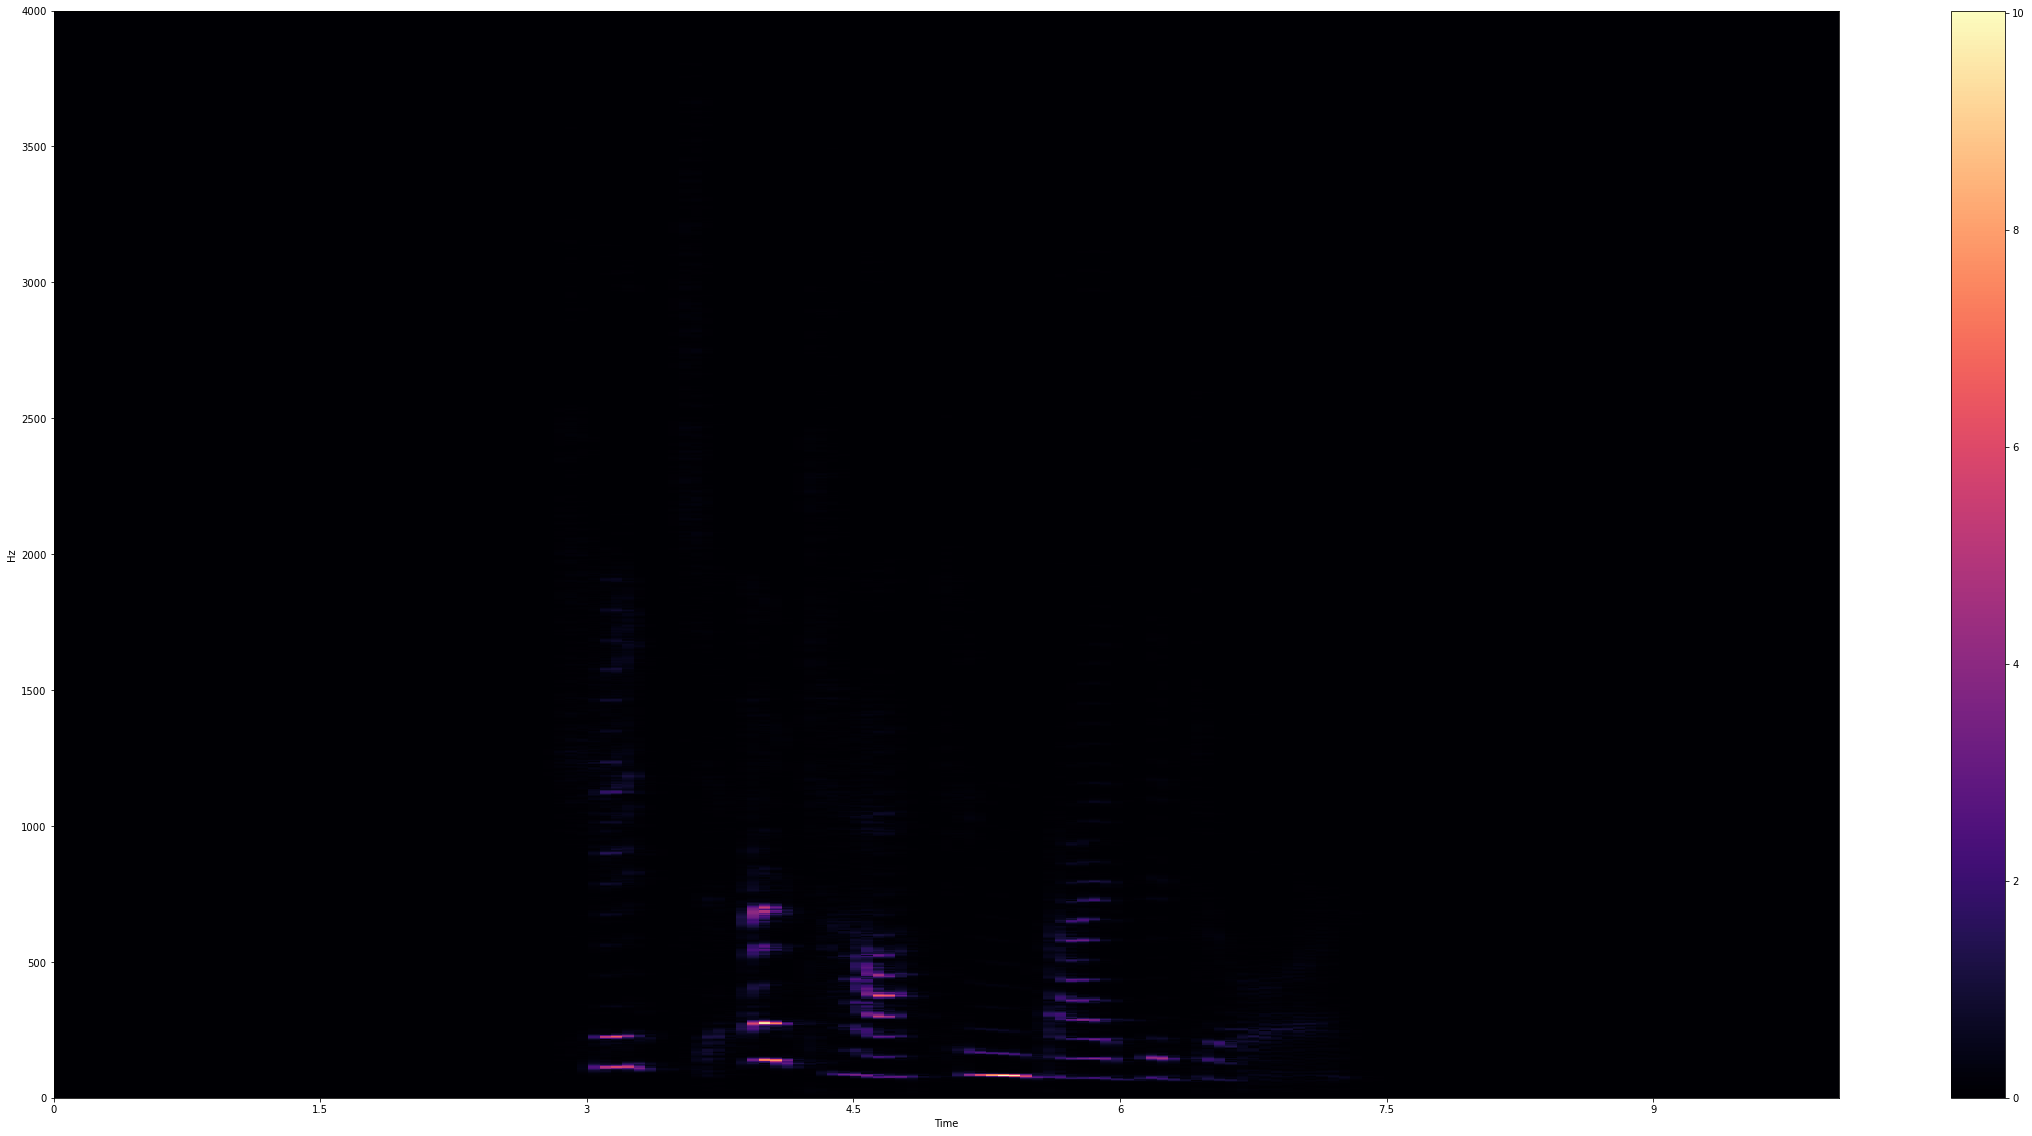

In [24]:
D = np.abs(librosa.stft(samples_female_neutral))
plt.figure(figsize=(40, 20))

librosa.display.specshow(D, sr=sampling_rate, x_axis='time', y_axis='linear');
plt.colorbar()
plt.savefig('images/female_neutral_image_fq_t.jpeg')
plt.show()



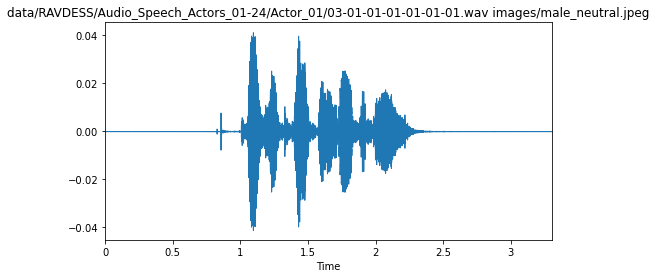

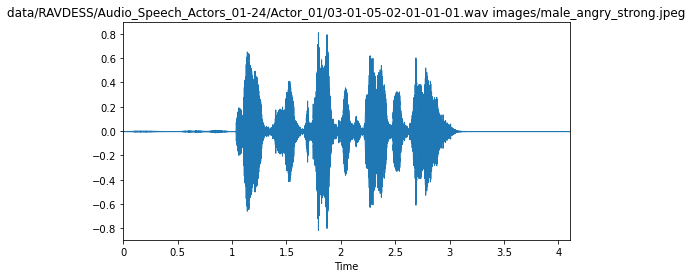

In [25]:
samples_male_neutral = display_waveplot(male_neutral_file, male_neutral_image, sampling_rate)
samples_male_angry_strong = display_waveplot(male_angry_strong_file, male_angry_strong_image, sampling_rate)

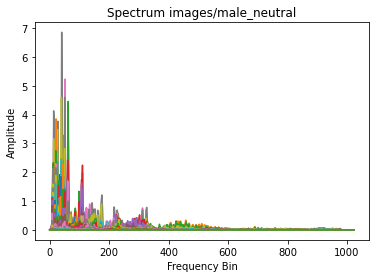

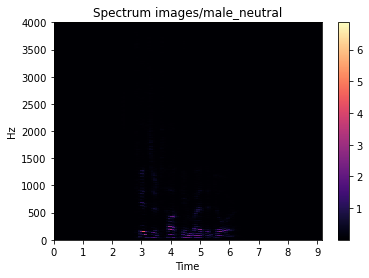

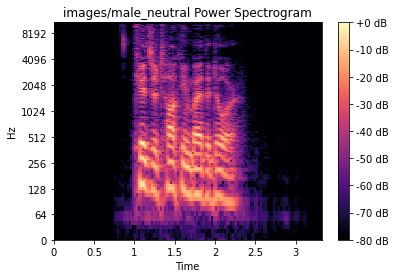

In [26]:
display_spectrogram(samples_male_neutral, 'images/male_neutral')

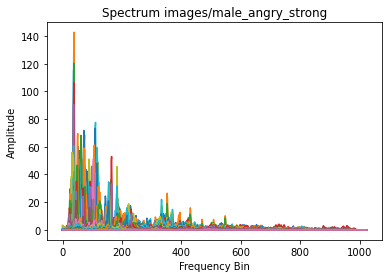

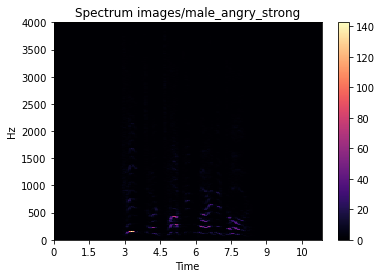

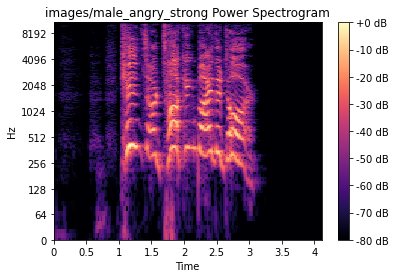

In [27]:
display_spectrogram(samples_male_angry_strong, 'images/male_angry_strong')

In [28]:

def mel_spectogram_db(file_name, mels=3, sr=sampling_rate):
    """Returns the mel spectrogram for a given audio file and mel count
        Args:
            file_name (str): File name of the WAV file
            mels (int): Target length in seconds
        Returns:
            numpy.ndarray: Numpy array of mel spectrogram values
    """
    data, sample_rate = librosa.load(file_name, res_type="kaiser_fast", sr=sr)
    print('sample_rate:', sample_rate)
    mel_spectogram = librosa.feature.melspectrogram(y=data, sr=sample_rate, n_mels=mels)
    mel_db = librosa.power_to_db(mel_spectogram, ref=np.max)
    return mel_db.T


In [29]:
mel = mel_spectogram_db(female_neutral_file)

sample_rate: 8000


In [17]:
1.1985034013605442/52

0.02304814233385662

In [30]:
mfcc =  fe.getMfcc(fe.getTrimmed( fe.getSamples(female_angry_strong_file,22050)), 22050)
len(mfcc)

13

In [31]:
22050/8000*53

146.08125

In [32]:
np.shape(mfcc), len(mfcc), len(mfcc[0])

((13, 119), 13, 119)

In [33]:
#take the mean for each coeficient in fonction of time
np.mean(mfcc, axis=1)

array([-381.29706  ,   47.87767  ,  -38.91838  ,    9.375215 ,
        -26.228214 ,   -6.570693 ,   -8.619551 ,  -15.410876 ,
         -7.6462693,   -2.8185608,   -8.83765  ,   -1.484579 ,
        -12.688246 ], dtype=float32)

In [34]:
np.var(mfcc, axis=1)

array([23532.941   ,  2691.0127  ,  1731.7732  ,  1068.5372  ,
         634.55396 ,   411.6156  ,   379.33936 ,   421.48148 ,
         288.06674 ,   182.0066  ,    92.6098  ,   123.294365,
         189.117   ], dtype=float32)

In [72]:
def displayMfcc(mfcc,samplincg_rate,file_name):
    import librosa.display
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    img = librosa.display.specshow(mfcc, x_axis='time',  ax=ax,sr=sampling_rate)
    fig.colorbar(img, ax=ax)
    plt.savefig("images\\"+ file_name + '.jpeg')
    ax.set(title=file_name)
    ax.set_ylabel('MFCC Coefficients')

In [36]:
import importlib
importlib.reload(fe)

<module 'feature_extraction' from 'c:\\Users\\Shadow\\Jedha\\feature_extraction.py'>

In [48]:
sampling_rate = 22050

In [68]:
115/22050

0.005215419501133787

(13, 119)
2.7399546485260773
3.9039455782312924


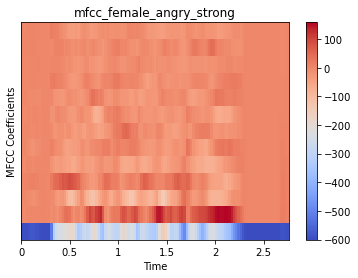

In [73]:
mfcc_female_angry_strong =  fe.getMfcc(fe.getTrimmed( fe.getSamples(female_angry_strong_file,sampling_rate)), sampling_rate)
print(np.shape(mfcc_female_angry_strong))

displayMfcc(mfcc_female_angry_strong, sampling_rate, 'mfcc_female_angry_strong')
print(librosa.get_duration(fe.getTrimmed( fe.getSamples(female_angry_strong_file,sampling_rate))))

print(librosa.get_duration(fe.getSamples(female_angry_strong_file,sampling_rate)))



(13, 115)
2.6617233560090705
3.6369614512471657


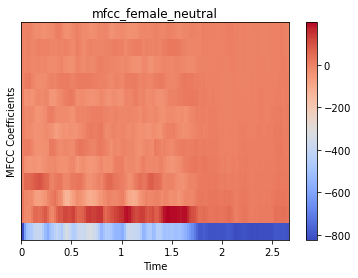

In [74]:
mfcc_female_neutral =  fe.getMfcc(fe.getTrimmed( fe.getSamples(female_neutral_file,sampling_rate)), sampling_rate)
print(np.shape(mfcc_female_neutral))

displayMfcc(mfcc_female_neutral, sampling_rate, 'mfcc_female_neutral' )
print(librosa.get_duration(fe.getTrimmed( fe.getSamples(female_neutral_file,sampling_rate))))

print(librosa.get_duration(fe.getSamples(female_neutral_file,sampling_rate)))

In [75]:
mfcc_female_neutral

array([[-8.1706653e+02, -6.1405457e+02, -5.0929236e+02, ...,
        -7.9765991e+02, -7.9997632e+02, -8.0461847e+02],
       [ 1.4898930e+01, -1.2302677e+01, -1.9320284e+01, ...,
         3.8206398e+01,  3.5540348e+01,  3.0365402e+01],
       [ 1.2222436e+01, -1.1546534e+01, -9.4416752e+00, ...,
         2.6622139e+01,  2.5374557e+01,  2.2758259e+01],
       ...,
       [-6.2715626e-01, -4.0927391e+00, -8.5243833e-01, ...,
         7.6295719e+00,  4.2846951e+00,  1.6925160e+00],
       [-1.1770536e+00, -1.1008473e+01, -1.0893611e+00, ...,
         8.9815426e+00,  2.9309046e+00, -8.8776261e-01],
       [-1.3329432e+00, -1.4532478e+00,  4.9366140e-01, ...,
         7.4752603e+00,  2.1561902e+00, -2.3571250e+00]], dtype=float32)

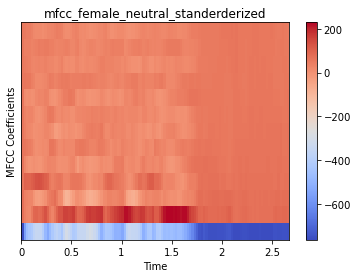

In [79]:
mfcc_female_neutral -= np.mean(mfcc_female_neutral, axis=0) 
displayMfcc(mfcc_female_neutral, sampling_rate, 'mfcc_female_neutral_standerderized' )

In [76]:
from sklearn import hmm

ImportError: cannot import name 'hmm' from 'sklearn' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\__init__.py)